In [6]:
#conda create --name conda_virtualenv python=3.8

^C

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd  # importa a biblioteca pandas muito usada para mexer com arquivos xlsx
import matplotlib.pyplot as plt
from pandas import DataFrame #Importa da biblioteca pandas a opção data frame 
import math
distancia_est = pd.read_excel(r"Distancia-Euclidiana-Estações.xlsx")  # le os dados para fazer a previsão

In [18]:
dist= np.array(distancia_est)

In [19]:
dist

array([[   0.        , 5235.93643007, 7683.40318848, 5059.59486457,
        3806.59450848, 9133.24780868, 7880.90154201, 4767.17863785],
       [5235.93643007,    0.        , 3718.85928159, 3139.78449723,
        4312.27244161, 5010.41913874, 4181.00195381, 4227.35727213],
       [7683.40318848, 3718.85928159,    0.        , 4094.67723164,
        6309.99751774, 3398.85919923, 1871.55759776, 5264.83095829],
       [5059.59486457, 3139.78449723, 4094.67723164,    0.        ,
        3978.32124848, 6044.33984923, 4114.7282323 , 3926.22732764],
       [3806.59450848, 4312.27244161, 6309.99751774, 3978.32124848,
           0.        , 7932.72818059, 6259.16699885, 3847.01557995],
       [9133.24780868, 5010.41913874, 3398.85919923, 6044.33984923,
        7932.72818059,    0.        , 3560.82613696, 7345.69601609],
       [7880.90154201, 4181.00195381, 1871.55759776, 4114.7282323 ,
        6259.16699885, 3560.82613696,    0.        , 5595.06248131],
       [4767.17863785, 4227.35727213, 526

In [4]:
dist.max()

9133.247808683882

In [5]:
dt =DataFrame((dist/dist.max()))

In [6]:
dt= np.array(round(dt,2))

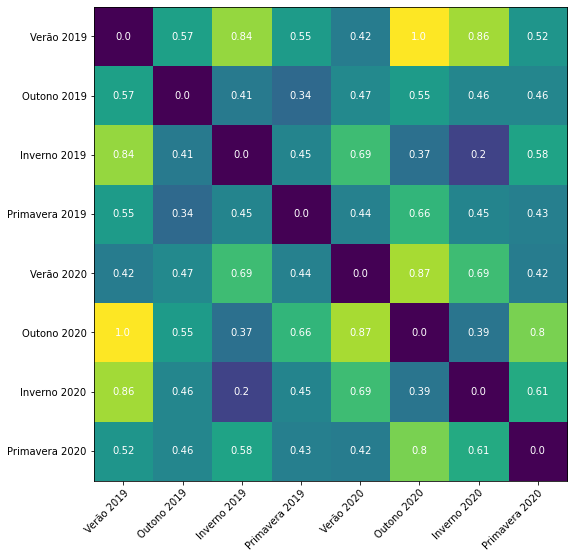

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

est1 = ["Verão 2019", "Outono 2019", "Inverno 2019", "Primavera 2019",
              "Verão 2020", "Outono 2020", "Inverno 2020", "Primavera 2020"]
est2 = ["Verão 2019", "Outono 2019", "Inverno 2019", "Primavera 2019",
              "Verão 2020", "Outono 2020", "Inverno 2020", "Primavera 2020"]



fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(dt)

# We want to show all ticks...
ax.set_xticks(np.arange(len(est1)))
ax.set_yticks(np.arange(len(est2)))
# ... and label them with the respective list entries
ax.set_xticklabels(est1)
ax.set_yticklabels(est2)



# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(est1)):
    for j in range(len(est2)):
        text = ax.text(j, i, dt[i, j],
                       ha="center", va="center", color="w")


fig.tight_layout()
plt.show()

In [8]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
#     ax.spines[:].set_visible(True)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

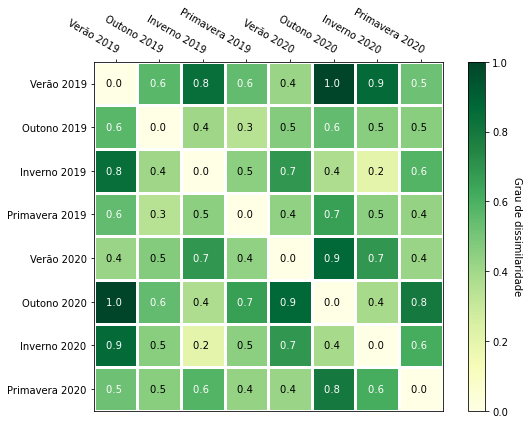

In [12]:
fig, ax = plt.subplots(figsize=(8,6))

im, cbar = heatmap(dt, est1, est2, ax=ax,
                    cmap="YlGn", cbarlabel="Grau de dissimilaridade")
texts = annotate_heatmap(im, valfmt="{x:.1f} ")

fig.tight_layout()
plt.savefig('DisEst.eps')
plt.show()

In [10]:
meses_2019 = ["Janeiro 2019", "Fevereiro 2019", "Março 2019", "Abril 2019","Maio 2019","Junho 2019", "Julho 2019",
              "Agosto 2019", "Setembro 2019", "Outubro 2019", "Novembro 2019", "Dezembro 2019","Janeiro 2020", "Fevereiro 2020", "Março 2020", "Abril 2020","Maio 2020","Junho 2020", "Julho 2020",
              "Agosto 2020", "Setembro 2020", "Outubro 2020", "Novembro 2020", "Dezembro 2020"]
meses_2020 =["Janeiro 2019", "Fevereiro 2019", "Março 2019", "Abril 2019","Maio 2019","Junho 2019", "Julho 2019",
              "Agosto 2019", "Setembro 2019", "Outubro 2019", "Novembro 2019", "Dezembro 2019","Janeiro 2020", "Fevereiro 2020", "Março 2020", "Abril 2020","Maio 2020","Junho 2020", "Julho 2020",
              "Agosto 2020", "Setembro 2020", "Outubro 2020", "Novembro 2020", "Dezembro 2020"]

distancia_ano = pd.read_excel(r"Distancia-Euclidiana-Meses.xlsx")  # le os dados para fazer a previsão

dist_a= np.array(distancia_ano)
dt_a =DataFrame((dist_a/dist_a.max()))
dt_a= np.array(round(dt_a,2))

In [13]:
dist_a.max()

11668.30175322347

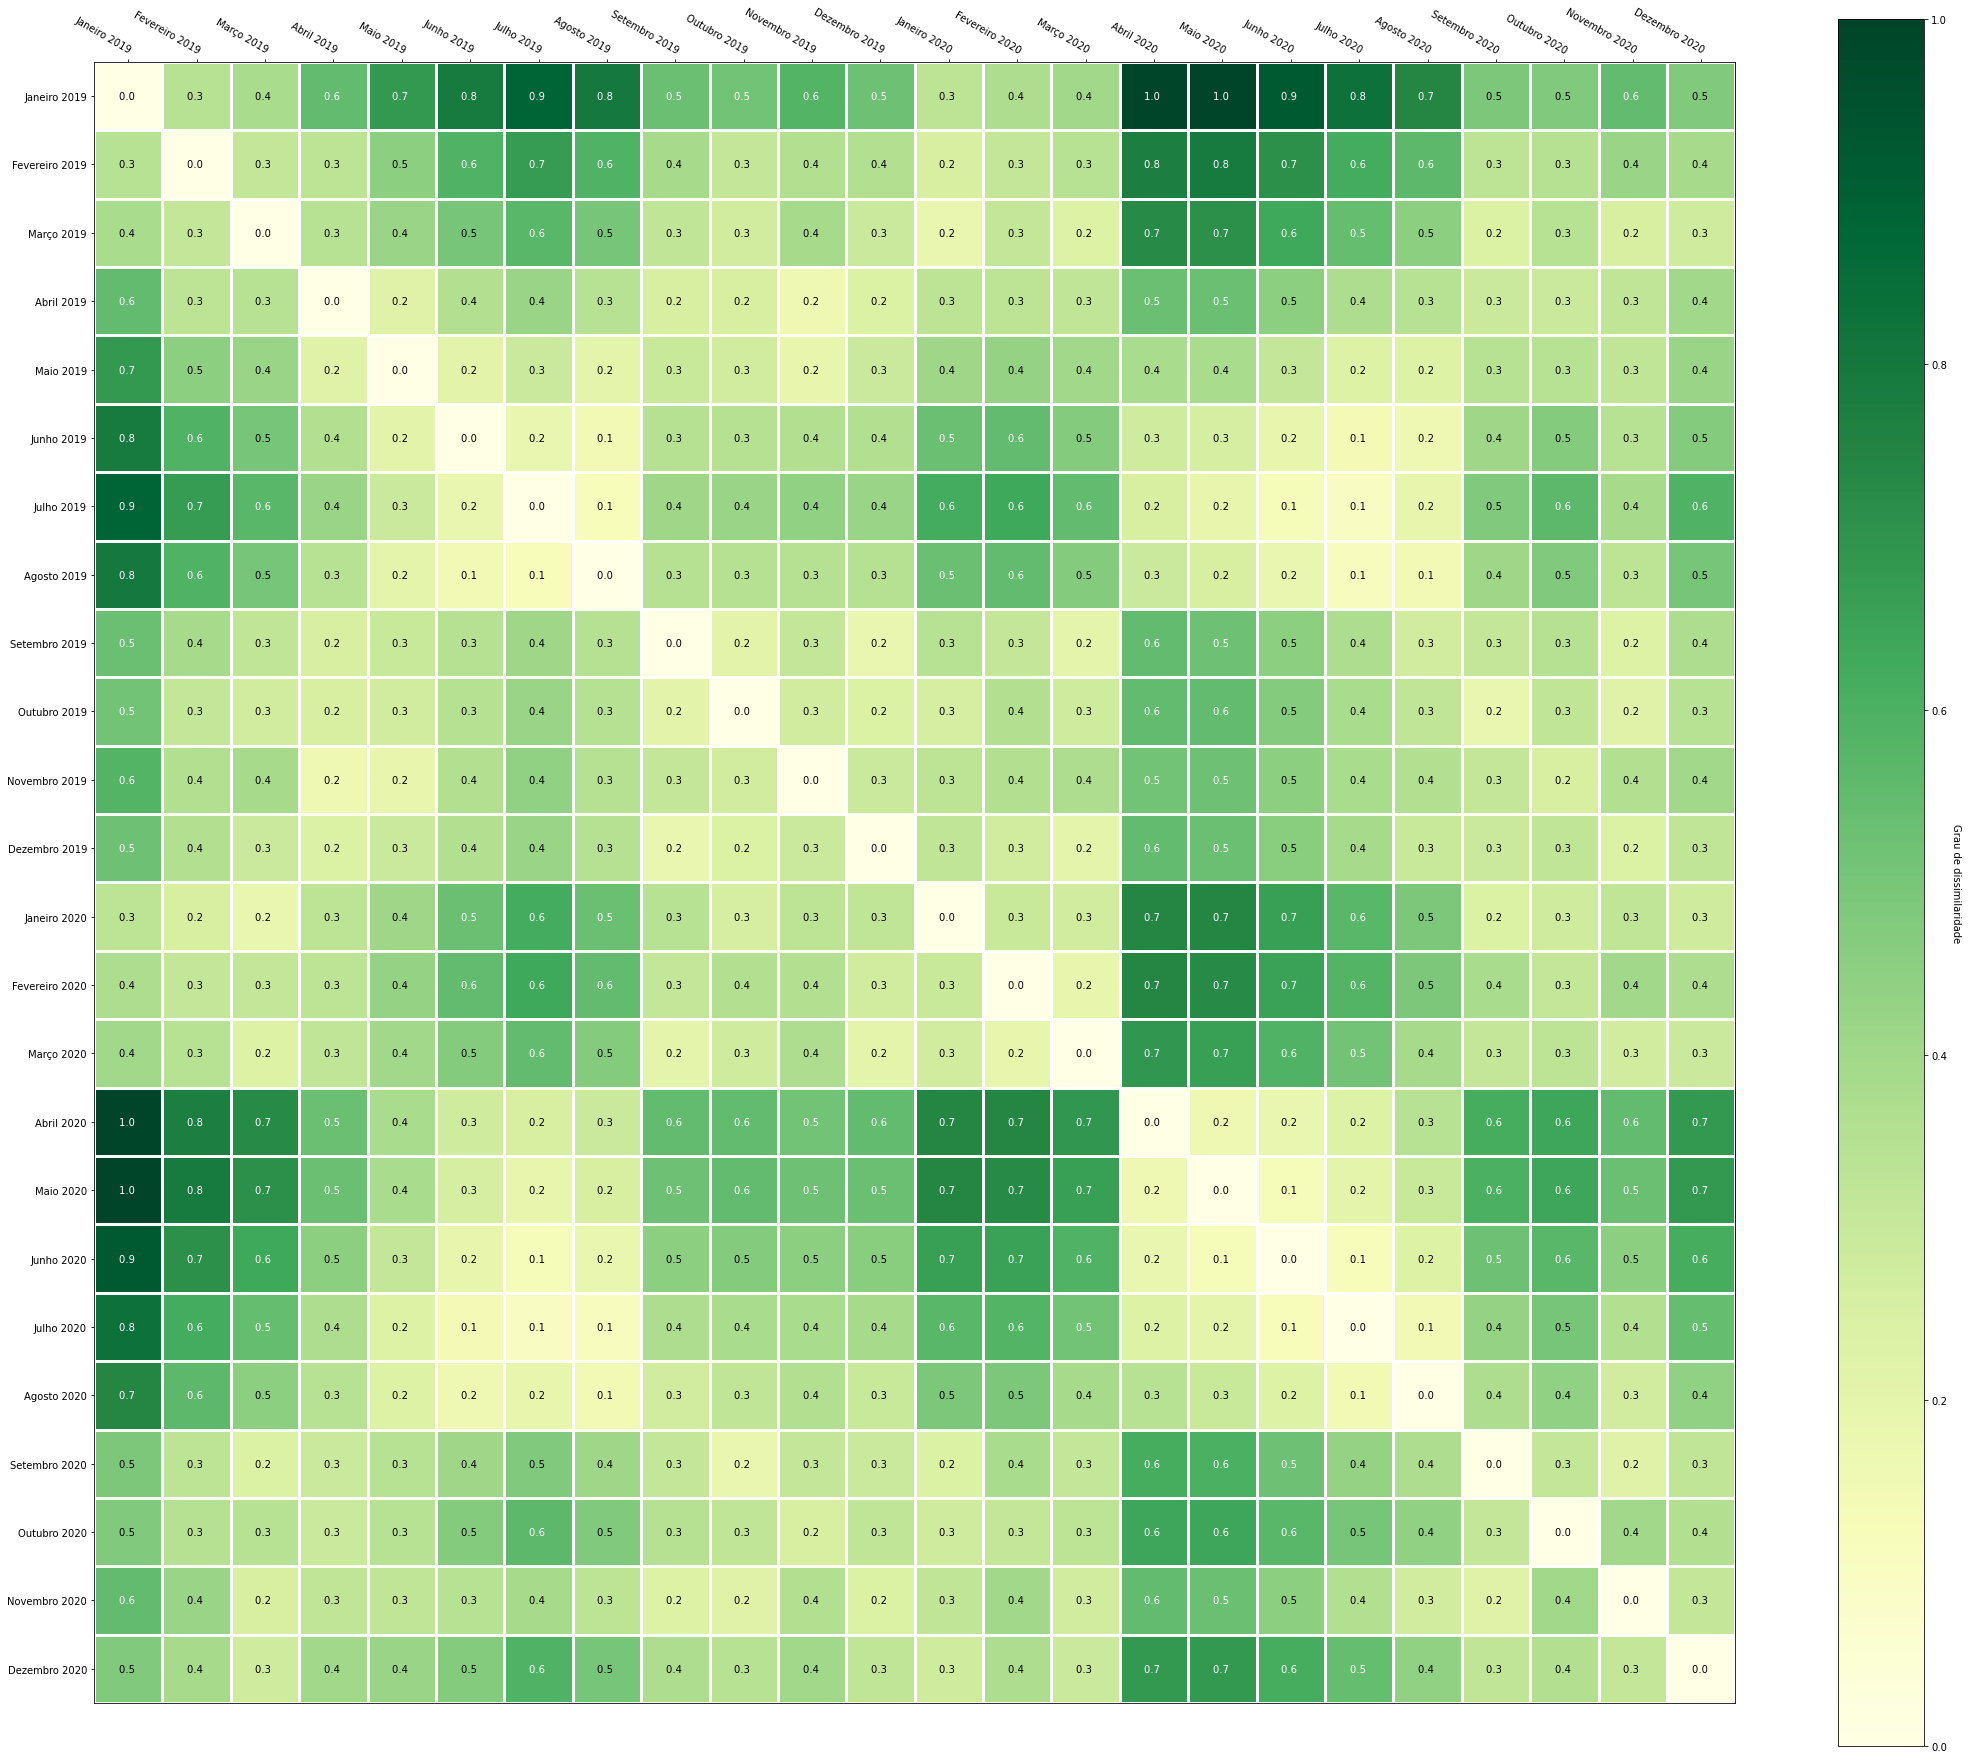

In [11]:
fig, ax = plt.subplots(figsize=(30,25))

im, cbar = heatmap(dt_a, meses_2019, meses_2020, ax=ax,
                    cmap="YlGn", cbarlabel="Grau de dissimilaridade")
texts = annotate_heatmap(im, valfmt="{x:.1f} ")

fig.tight_layout()
plt.savefig('Comparação')
plt.show()

In [15]:
dias_semana1 = ["Feriado","Domingo","Segunda", "Terça","Quarta", "Quinta","Sexta","Sábado"]
dias_semana2 = ["Feriado","Domingo","Segunda", "Terça","Quarta", "Quinta","Sexta","Sábado"]

distancia_dia = pd.read_excel(r"Distancia-Euclidiana-Semana.xlsx")  # le os dados para fazer a previsão

dist_d= np.array(distancia_dia)
dt_d =DataFrame((dist_d/dist_d.max()))
#dt_d =  np.array(dt_d)
dt_d= np.array(round(dt_d,2))



In [17]:
dist_d.max()

7916.017328386987

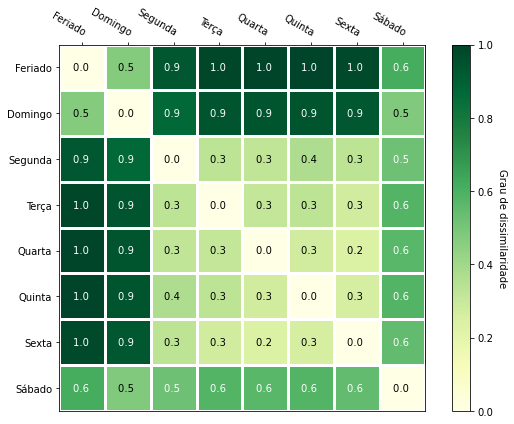

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

im, cbar = heatmap(dt_d, dias_semana1, dias_semana2, ax=ax,
                    cmap="YlGn", cbarlabel="Grau de dissimilaridade")
texts = annotate_heatmap(im, valfmt="{x:.1f} ")

fig.tight_layout()
plt.savefig('previsao.eps')
plt.show()


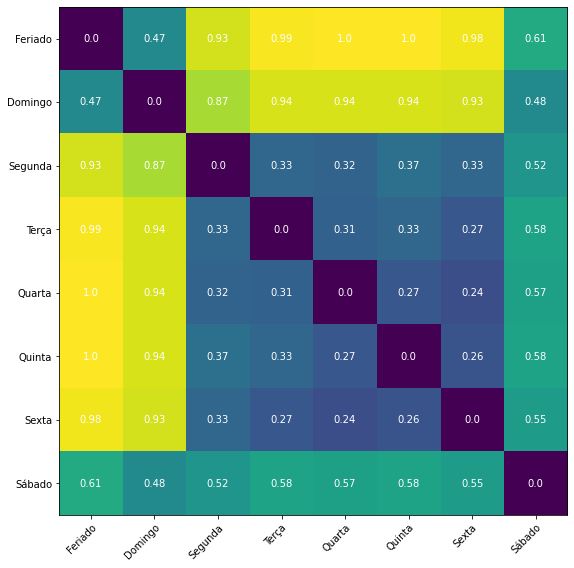

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(dt_d)

# We want to show all ticks...
ax.set_xticks(np.arange(len(dias_semana1)))
ax.set_yticks(np.arange(len(dias_semana2)))
# ... and label them with the respective list entries
ax.set_xticklabels(dias_semana1)
ax.set_yticklabels(dias_semana2)



# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(dias_semana1)):
    for j in range(len(dias_semana2)):
        text = ax.text(j, i, dt_d[i, j],
                       ha="center", va="center", color="w")


fig.tight_layout()
plt.show()